# <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">AdaBoost (Adaptive Boosting) Classification: Mushroom Dataset</p>


<div class="alert alert-block alert-info alert">

## <span style=" color:#bf2e98">Introduction

### Mushroom Hunting: Edible or Poisonous?

Data Source: https://archive.ics.uci.edu/ml/datasets/Mushroom


This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. 

**Attribute Information:**

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
</div>

<div class="alert alert-block alert-success">
    
### <span style=" color:#eb346e">What is Boosting?
* The concept of **boosting** is not actually a machine learning algorithm, it is methodology applied to an existing ML algorithm, most commonly applied to the decision tree.
* In machine learning, boosting is **an ensemble meta-algorithm** for primarily **reducing bias, variance**. It is used in supervised learning and a family of machine learning algorithms that **convert weak learners to strong ones**.
* A **combination of estimators** with an applied coefficient can act as an effective ensemble estimator.
### AdaBoost (Adaptive Boosting)
* AdaBoost works by using an ensemble of **weak learners** and then combining the **through the use of weighted sum**.
* It adapts by using previously created weak learners in order to adjust misclassified instances for the next created weak learner.
#### What is a weak learner?
* A weak model is a model that is too simple to perform well on its own. For example, the weakest decision tree possible would be a **stump**, one node and two leaves!
* Unlike a single decision tree which fits to all the data at once (fitting the data hard), AdaBoost aggregates multiple weak learners, allowing the overall **ensemble model to learn slowly from the features**.

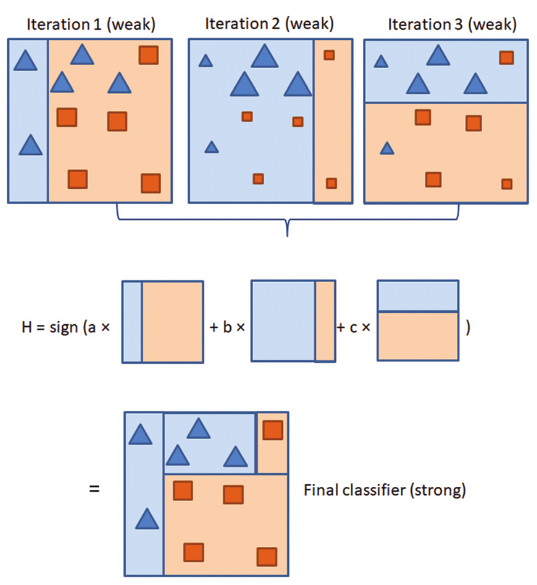

* Intuition of Adaptive Boositng: Each stump essentially represents the strength of a feature to predict. Building these stumps in series and adding in the alphaa parameter allows us to intelligently **combine the importance of each feature together**.
* **Unlike Random Forest, it is possible to overfit with AdaBoost**, however, it takes many trees to do this. Usually error has already stabilized way before enough trees are added to cause overfitting.
</span>

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

In [2]:
df = pd.read_csv("mushrooms.csv")

In [3]:
df.head()

# "p" for Poisonous, "e" for Edible.

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# See the data types and the missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [28]:
# Another way to see the missing values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
# discover the target column and see if it is imbalanced
df["class"].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

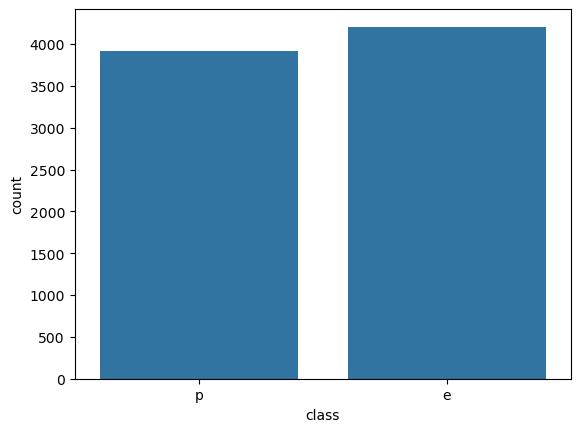

In [9]:
# Visualize it
sns.countplot(df, x="class");

# almost balanced data

In [14]:
# Although features are categorical in this dataset, we can llok at the describe of the data

df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In this table, "unique" shows the number of unique classes in the columns. "Top" represents the most frequent class.

In [16]:
df.describe().T.reset_index().sort_values("unique")

# sort it by unique column in describe

,index,count,unique,top,freq
16,veil-type,8124,1,p,8124
0,class,8124,2,e,4208
4,bruises,8124,2,f,4748
6,gill-attachment,8124,2,f,7914
7,gill-spacing,8124,2,c,6812
8,gill-size,8124,2,b,5612
10,stalk-shape,8124,2,t,4608
18,ring-number,8124,3,o,7488
2,cap-surface,8124,4,y,3244
17,veil-color,8124,4,w,7924


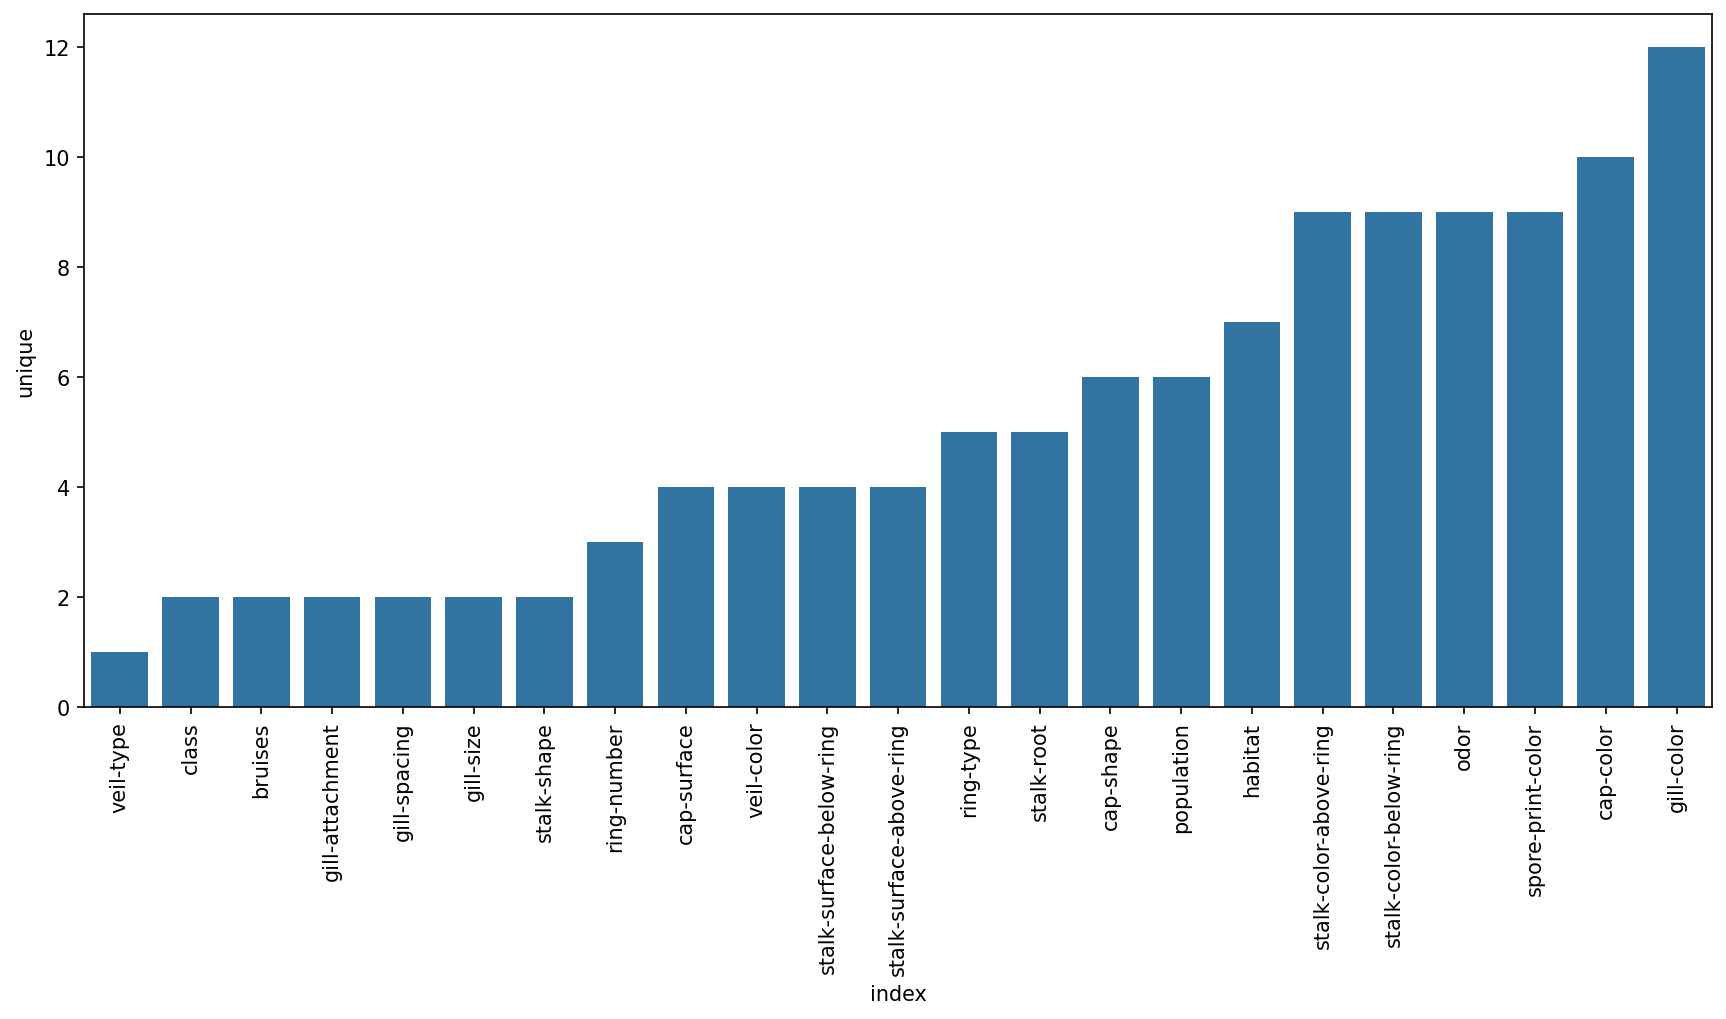

In [27]:
# Let's visualize these features with unique categories
# Later we will use get_dummies for these categories

feat_uni =df.describe().T.reset_index().sort_values("unique")

plt.figure(figsize=(14,6),dpi=150)
sns.barplot(data=feat_uni, x="index", y="unique")
plt.xticks(rotation=90);

## Train | Test Split

In [29]:
# drop the target column
X = df.drop('class',axis=1)

In [30]:
# Since we have categorical features, convert them into numbers
X = pd.get_dummies(X, dtype=int, drop_first=True)

In [35]:
# See the X data with numeric categories (0 and 1)
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [31]:
# Target column
y = df['class']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

<div class="alert alert-block alert-success">
    
## <span style=" color:#eb346e">AdaBoost Model

See the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

class sklearn.ensemble.AdaBoostClassifier(estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)

**estimator:** object, default=None

The base estimator from which the boosted ensemble is built. Support for sample weighting is required, as well as proper classes_ and n_classes_ attributes. If None, then the base estimator is DecisionTreeClassifier initialized with max_depth=1
</span>.

In [36]:
from sklearn.ensemble import AdaBoostClassifier

In [37]:
# Create a simple model with one estimator
model = AdaBoostClassifier(n_estimators=1)

In [38]:
# Fit the model
model.fit(X_train,y_train)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=1)

## Evaluation
* Confusion Matrix
* Accuracy Score
* Classification Report

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# To plot Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay  

In [40]:
# Prediction
predictions = model.predict(X_test)

In [41]:
# See the predictions
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [42]:
# Confusion Matrix
confusion_matrix(y_test, predictions)

array([[529, 126],
       [ 23, 541]], dtype=int64)

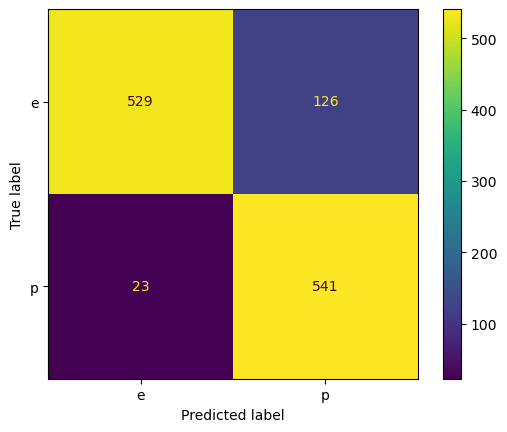

In [43]:
# Plot the Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, predictions);

In [45]:
# See the accuracy score
accuracy_score(y_test, predictions)

0.8777686628383922

In [46]:
# Look at the Classification Report and compare the classes

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



### Feature Importance

In [47]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [48]:
# There is one "1" in above array. Its index...
model.feature_importances_.argmax()

22

In [49]:
# Let's see what this feature is
X.columns[22]

'odor_n'

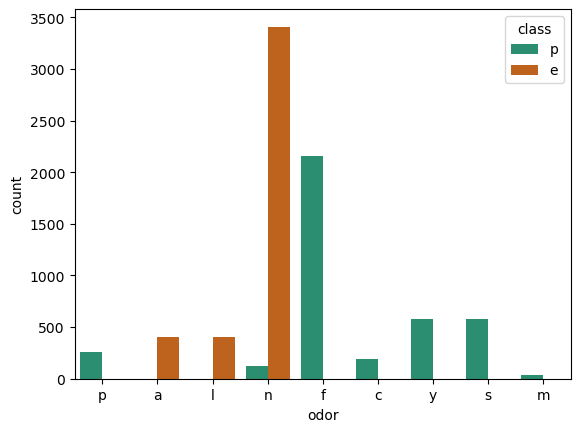

In [54]:
sns.countplot(data=df,x='odor',hue='class', palette="Dark2");

<div class="alert alert-warning alert-info">
<span style=" color:#bf2e98"> 

**Categories of odor feature:** almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, **none=n**, pungent=p, spicy=s.

So, **odor_n** is no oder. The model reached this accuracy only by checking if mushrooms have odor or not. As seen above, most of the "n" class consists of edible (e class) mushrooms. It means that, if there is no oder, it is most probably edible mushroom.</span>

### Analyzing performance as more weak learners are added

In [55]:
# How many features do we have in this model after get_dummies?

len(X.columns)

95

In [56]:
# Based on the features, let's increase the number of estimators and see haw the error rates change

error_rates = []

for n in range(1,96):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    
    error_rates.append(err)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adm

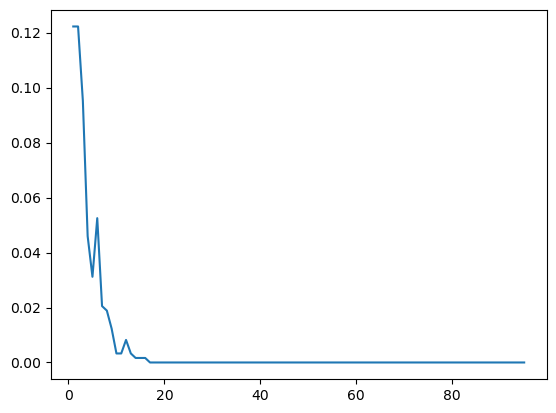

In [58]:
plt.plot(range(1,96),error_rates);

After 18-20 estimators, the model cannot decresse the error.

In [59]:
# Check the model
model

AdaBoostClassifier(n_estimators=95)

In [60]:
# Check the feature importance
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01052632, 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.        ,
       0.01052632, 0.        , 0.05263158, 0.03157895, 0.03157895,
       0.        , 0.        , 0.06315789, 0.02105263, 0.        ,
       0.        , 0.        , 0.09473684, 0.09473684, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01052632, 0.01052632, 0.        , 0.        , 0.        ,
       0.06315789, 0.        , 0.        , 0.        , 0.        ,
       0.03157895, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06315789, 0.        , 0.        ,
       0.01052632, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.     

In [62]:
# To see it as a DataFrame
features = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance'])

In [63]:
features

,Importance
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [65]:
# Filter more than 0 importance
imp_features = features[features['Importance']>0]
imp_features

,Importance
cap-color_c,0.010526
cap-color_n,0.010526
cap-color_w,0.010526
bruises_t,0.052632
odor_c,0.031579
odor_f,0.031579
odor_n,0.063158
odor_p,0.021053
gill-spacing_w,0.094737
gill-size_n,0.094737


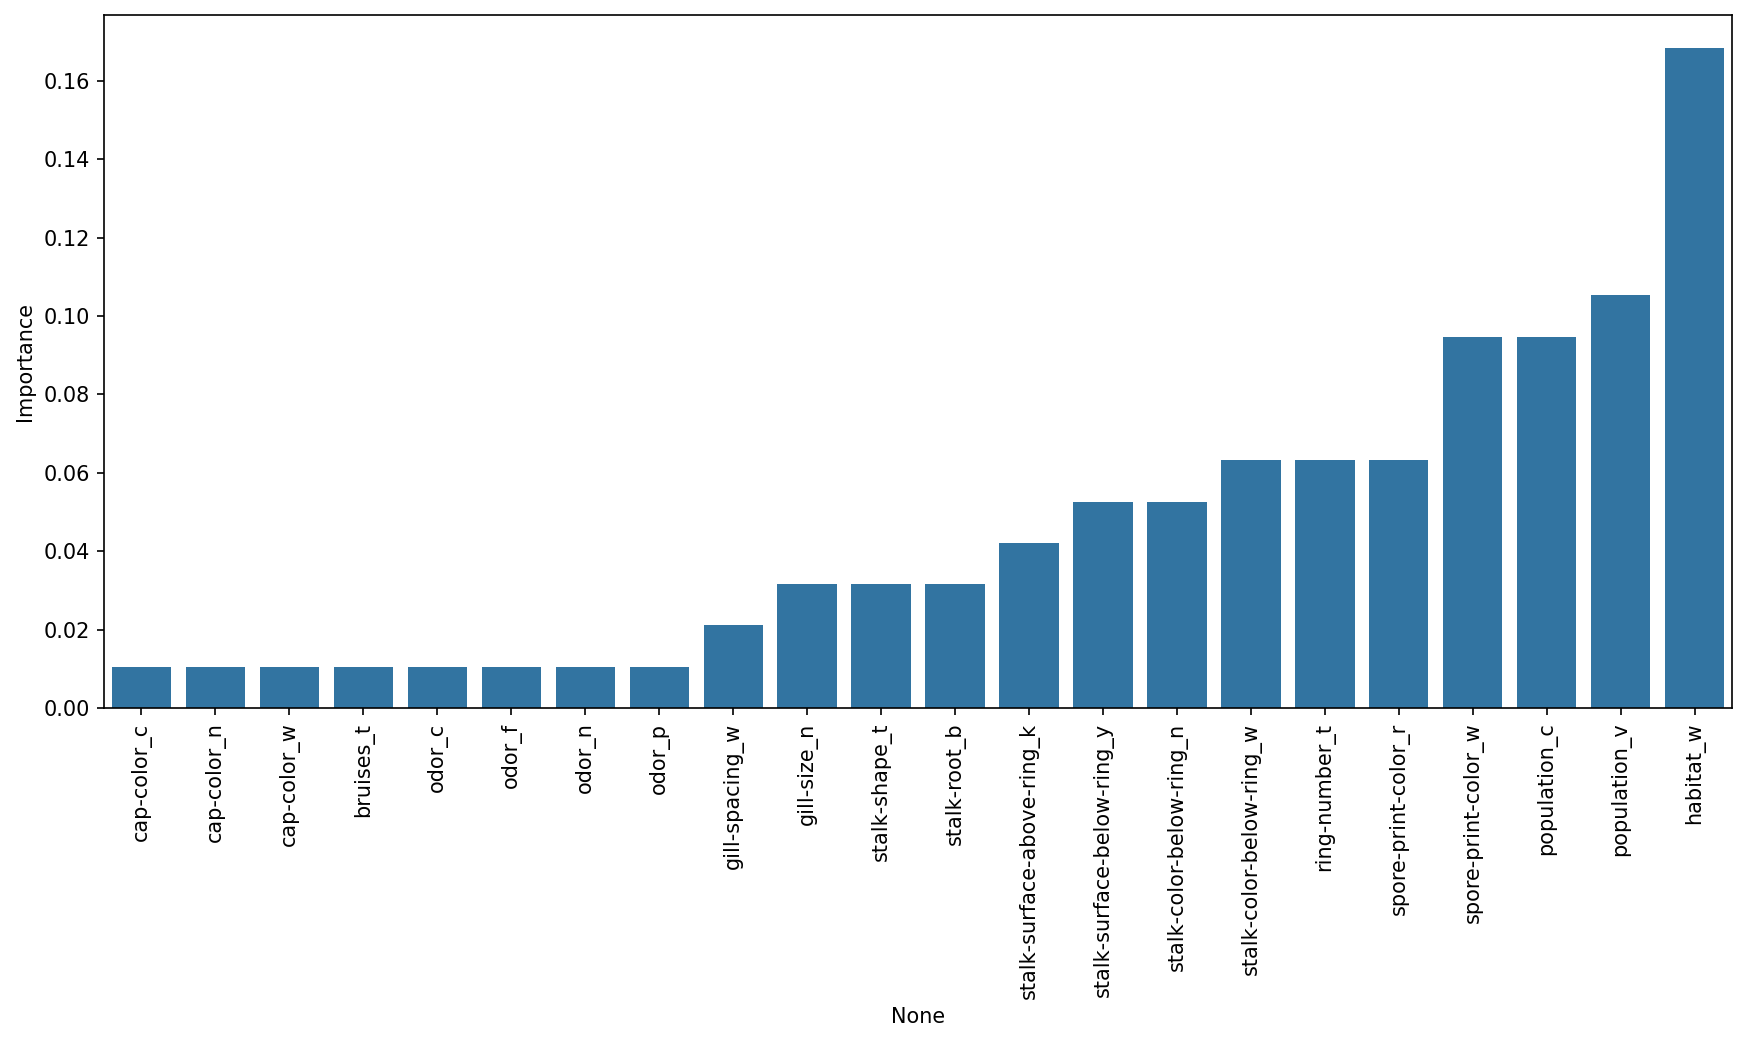

In [70]:
# Visualize imp_features

plt.figure(figsize=(14,6), dpi=150)
sns.barplot(data=imp_features.sort_values("Importance"), x=imp_features.index, y="Importance")
plt.xticks(rotation=90);

<div class="alert alert-warning alert-info">
    
<span style=" color:#bf2e98"> 

We can see how feature importance changed. In the previous model it was "odor_n" but now "habitat_w". Let's take a look at habitat feature with its categories. But remember these are all weak learner stumps, and feature importance is available for all the tree methods!

*habitat:* grasses=g, leaves=l, meadows=m, paths=p, urban=u, **waste=w**, woods=d
</span>

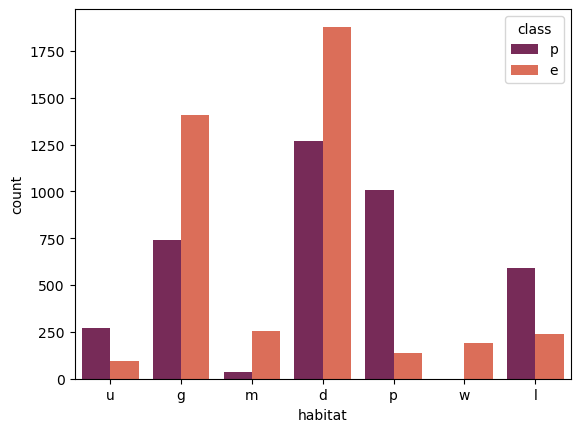

In [75]:
sns.countplot(data=df, x="habitat", hue="class", palette="rocket");

<div class="alert alert-warning alert-info">
    
<span style=" color:#bf2e98"> 

According to countplot, **habitat_w** have only edible (e) mushrooms. Therefore, this information is crucial to determine whether mushrooms are Edible or Poisonous.
</span>